In [11]:
import pandas as pd

df = pd.read_csv('../../data/raw/matches_rolling.csv', index_col=0)

In [12]:
feature_list = [cn for cn in df.columns[list(df.columns).index('match_hour'):]]
feature_list.append('result_home')
feature_list.remove('goal_ratio_home')
feature_list.remove('goal_ratio_away')
feature_list

['match_hour',
 'day_code',
 'week',
 'days_since_home',
 'days_since_away',
 'ga_per_xGA_home',
 'ga_per_xGA_away',
 'gf_per_xG_home',
 'gf_per_xG_away',
 'xg_away_rolling_3',
 'sh_away_rolling_3',
 'sot_away_rolling_3',
 'poss_away_rolling_3',
 'goal_ratio_away_rolling_3',
 'elo_away_rolling_3',
 'ga_per_xGA_away_rolling_3',
 'gf_per_xG_away_rolling_3',
 'xg_home_rolling_3',
 'sh_home_rolling_3',
 'sot_home_rolling_3',
 'poss_home_rolling_3',
 'goal_ratio_home_rolling_3',
 'elo_home_rolling_3',
 'ga_per_xGA_home_rolling_3',
 'gf_per_xG_home_rolling_3',
 'goal_ratio_away_rolling_1',
 'goal_ratio_home_rolling_1',
 'elo_rolling_diff',
 'goal_ratio_diff',
 'ga_per_xGA_diff',
 'gf_per_xG_diff',
 'home_won_game',
 'result_home']

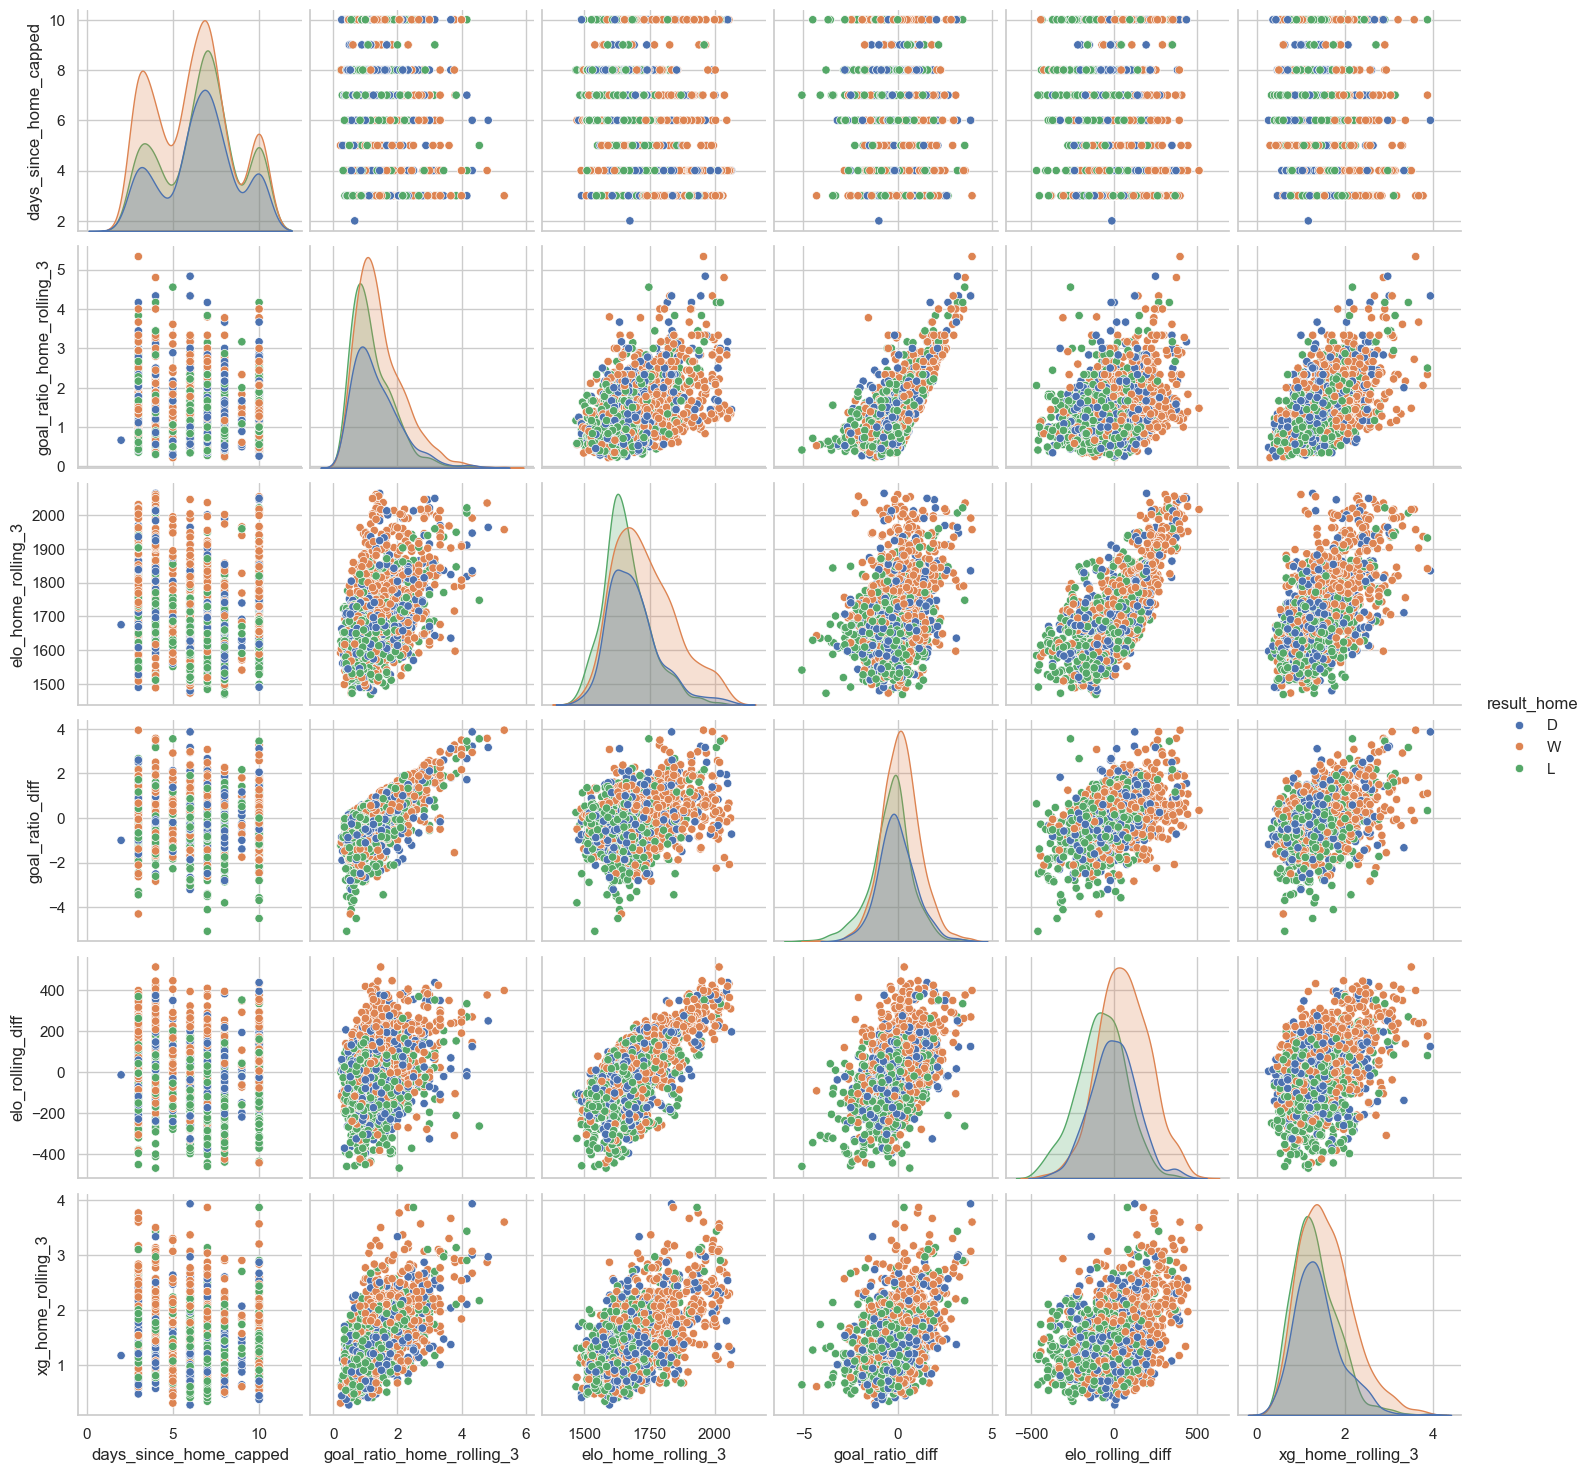

In [7]:
import seaborn as sns
df['days_since_home_capped'] = df['days_since_home'].clip(upper=10)
sns.pairplot(data=df[['days_since_home_capped', 'goal_ratio_home_rolling_3', 'elo_home_rolling_3', 'goal_ratio_diff', 'elo_rolling_diff', 'xg_home_rolling_3', 'result_home']], hue='result_home')

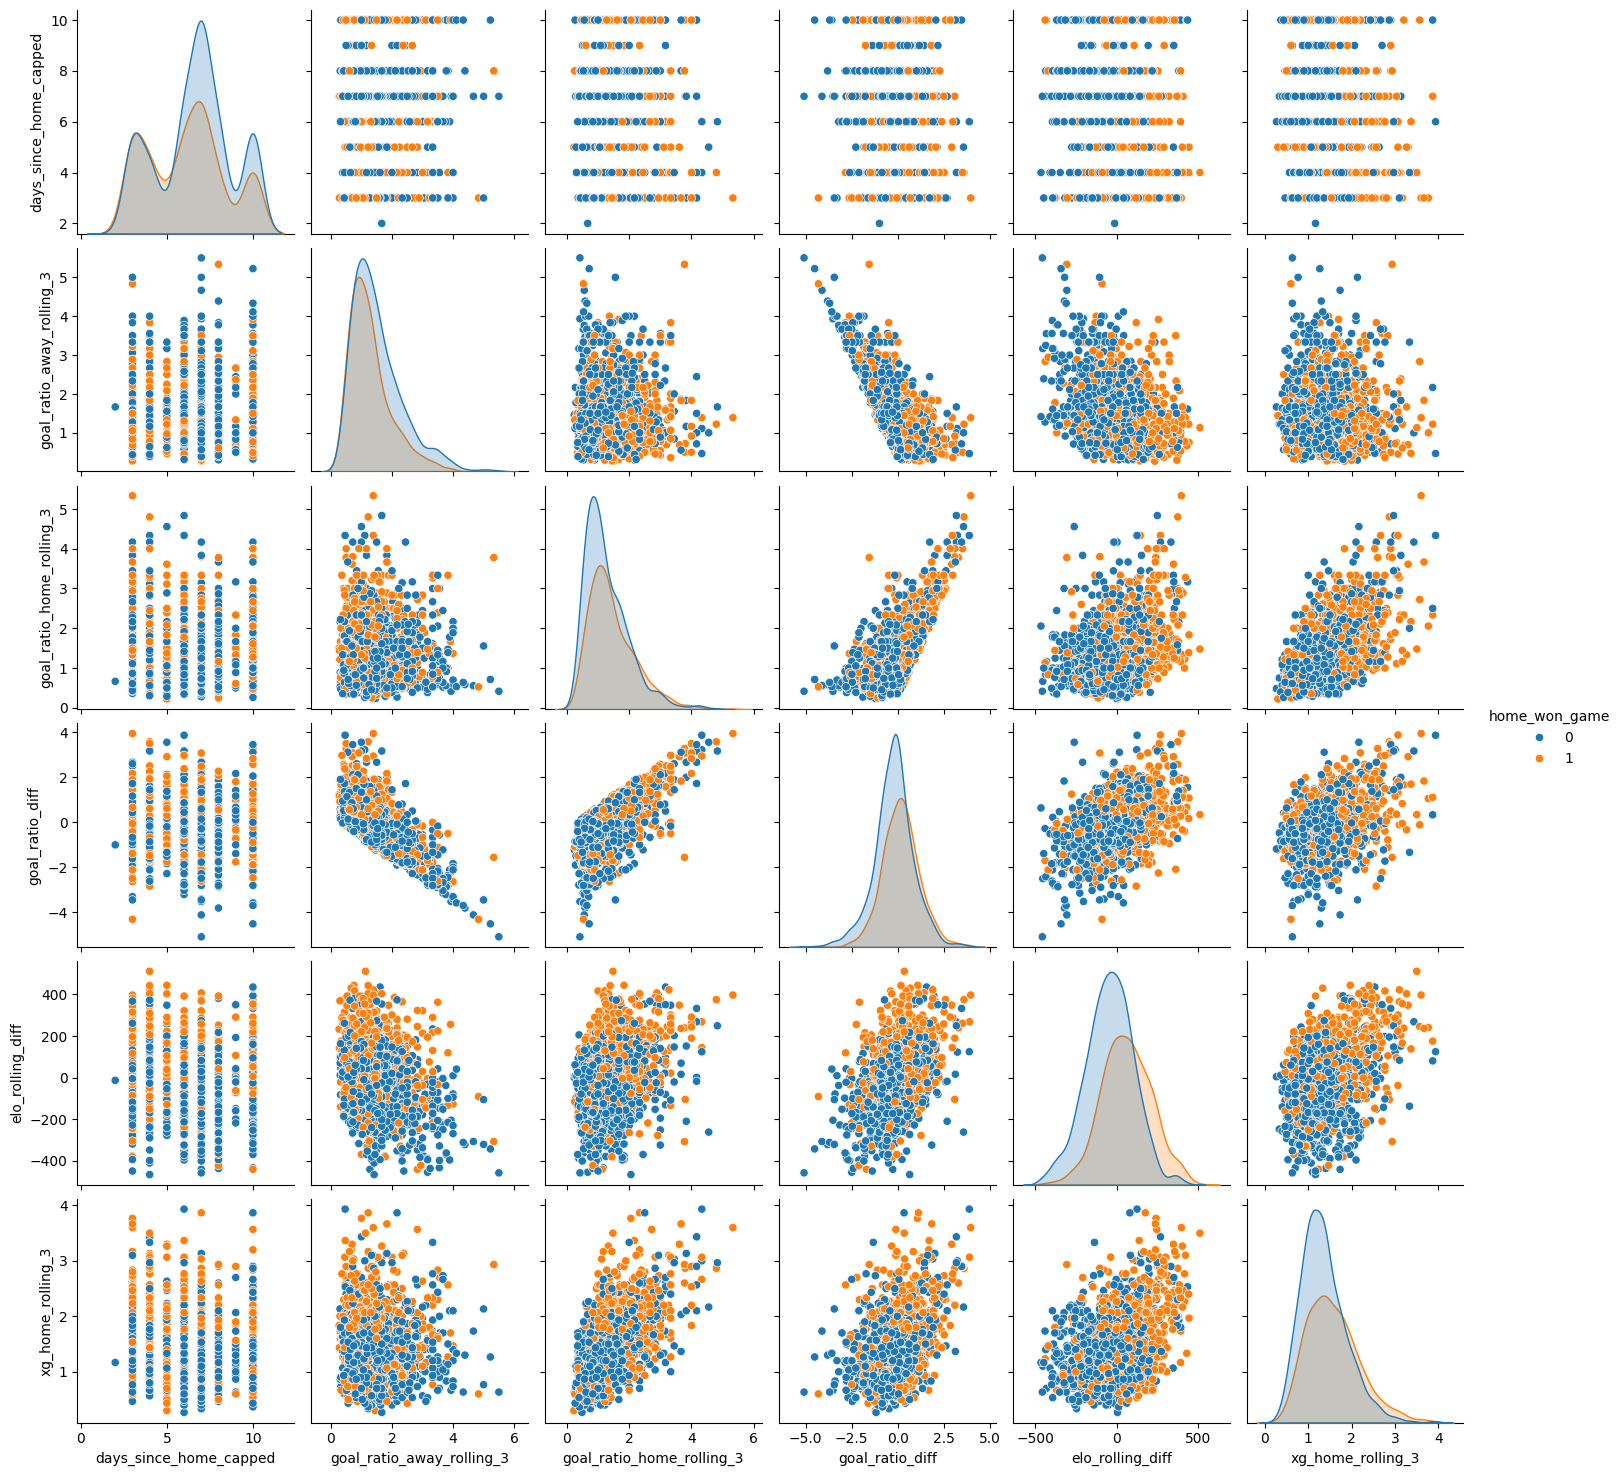

In [5]:
import seaborn as sns
df['days_since_home_capped'] = df['days_since_home'].clip(upper=10)
sns.pairplot(data=df[['days_since_home_capped', 'goal_ratio_away_rolling_3', 'goal_ratio_home_rolling_3', 'goal_ratio_diff', 'elo_rolling_diff', 'xg_home_rolling_3', 'home_won_game']], hue='home_won_game')

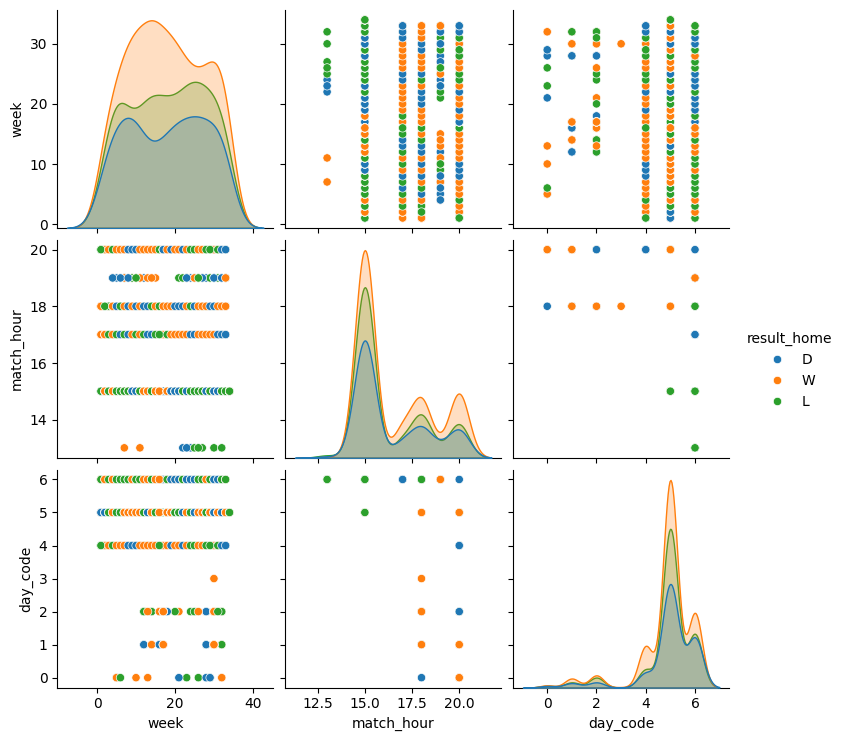

In [6]:
import seaborn as sns
sns.pairplot(data=df[['week', 'match_hour', 'day_code', 'result_home']], hue='result_home')

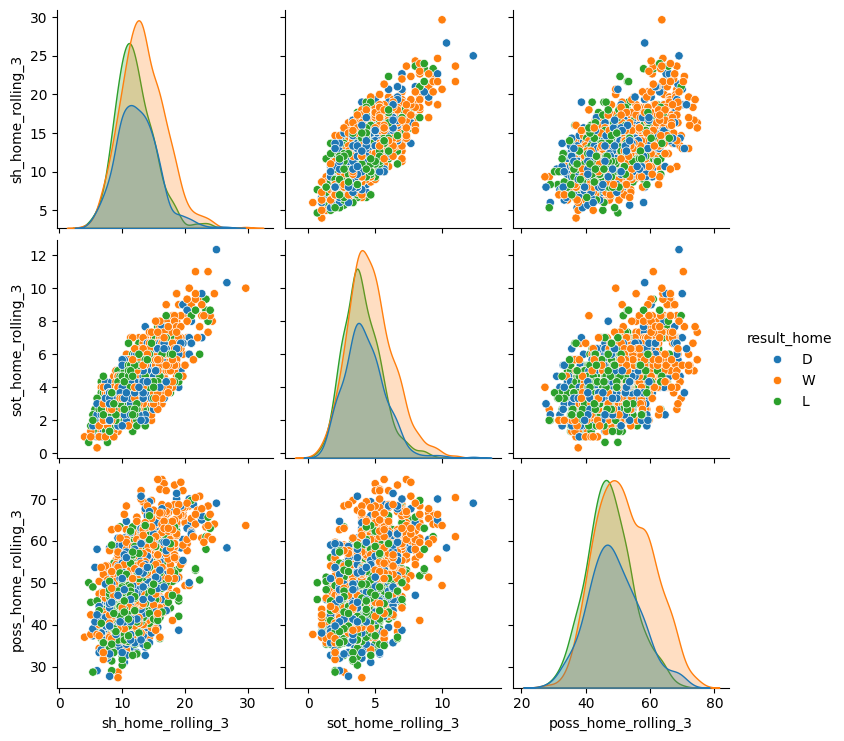

In [7]:
import seaborn as sns
sns.pairplot(data=df[['sh_home_rolling_3', 'sot_home_rolling_3', 'poss_home_rolling_3', 'result_home']], hue='result_home')

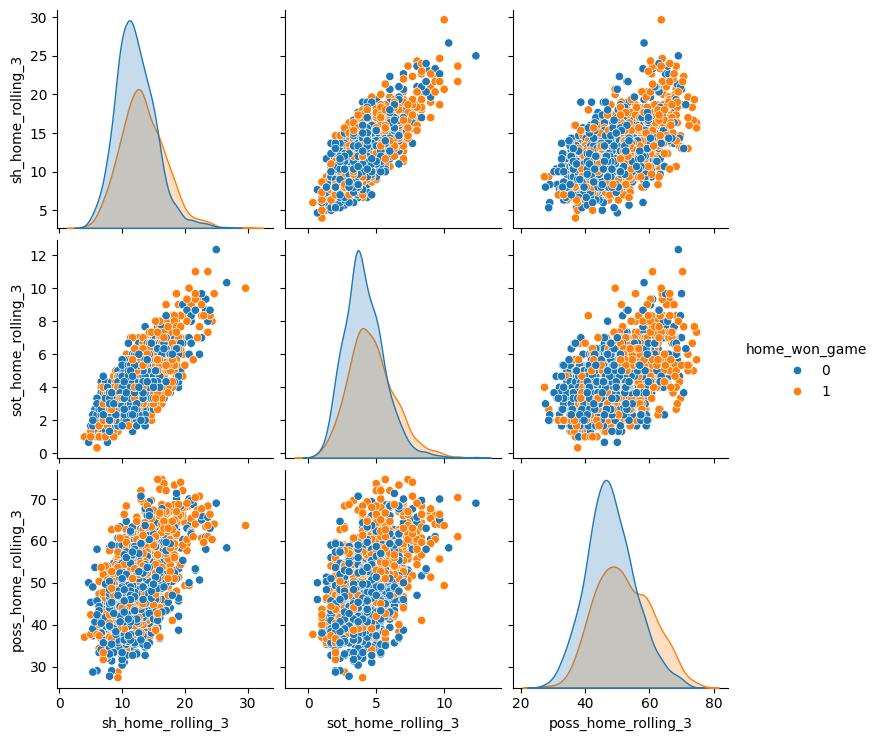

In [8]:
import seaborn as sns
sns.pairplot(data=df[['sh_home_rolling_3', 'sot_home_rolling_3', 'poss_home_rolling_3', 'home_won_game']], hue='home_won_game')

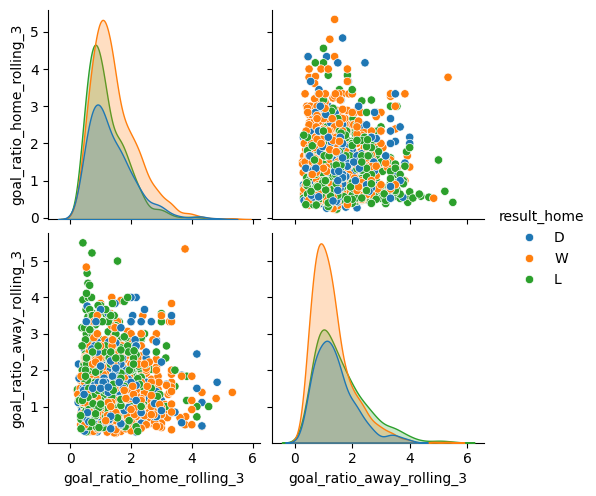

In [11]:
import seaborn as sns
df['days_since_home_capped'] = df['days_since_home'].clip(upper=10)
sns.pairplot(data=df[['goal_ratio_home_rolling_3', 'goal_ratio_away_rolling_3', 'result_home']], hue='result_home')

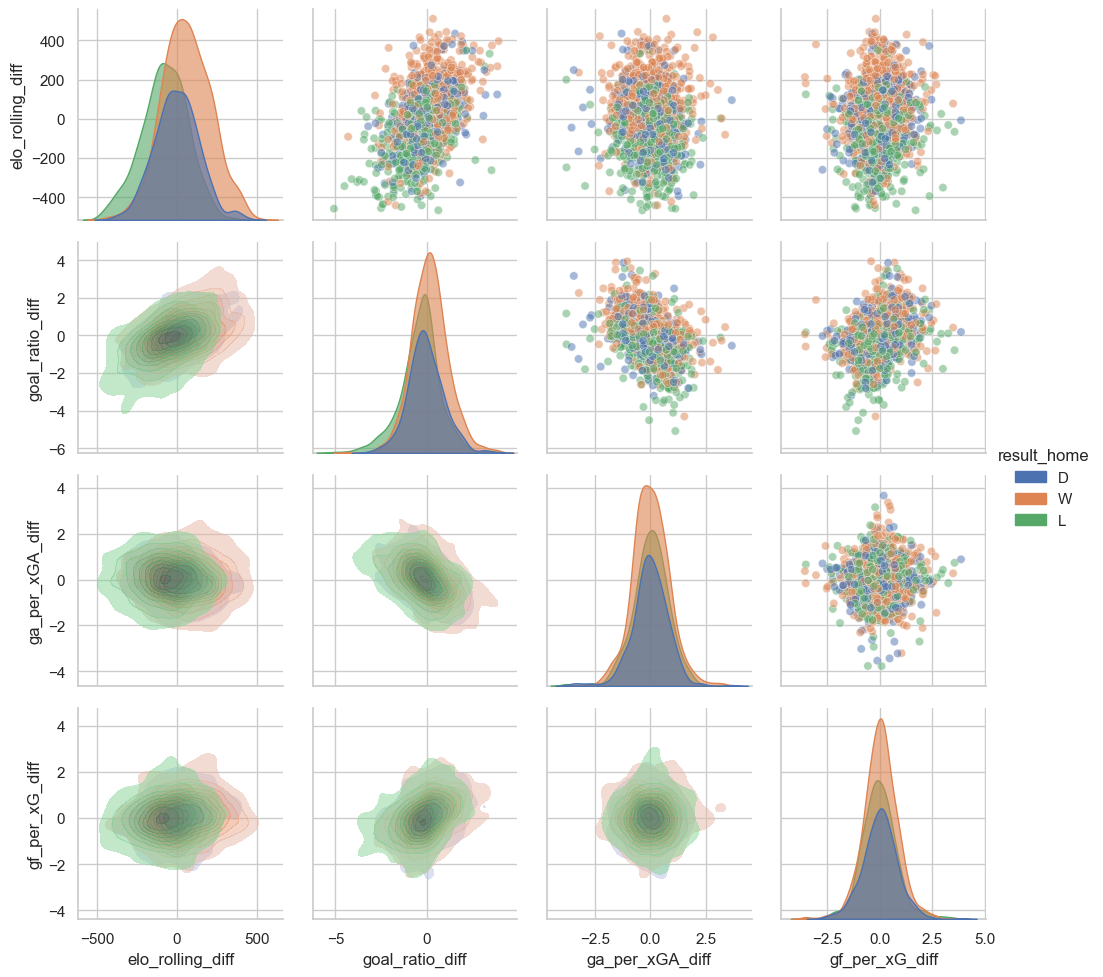

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Stil setzen
sns.set(style="whitegrid")

# Features auswählen
features = [
    'elo_rolling_diff',
    'goal_ratio_diff',
    'ga_per_xGA_diff',
    'gf_per_xG_diff'
]



# Grid mit Hue für Klassen
g = sns.PairGrid(df[features + ['result_home']], hue='result_home', diag_sharey=False)

# Obere Dreieck: Scatter
g.map_upper(sns.scatterplot, alpha=0.5)

# Untere Dreieck: KDE (optional)
g.map_lower(sns.kdeplot, fill=True, alpha=0.5)

# Diagonale: KDEs mit **common_norm=False**
g.map_diag(sns.kdeplot, fill=True, common_norm=True, alpha=0.6)

# Legende
g.add_legend()
plt.show()
